In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset
train_data=pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
#information about dataset
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
#finding the number of rows and columns in the dataset
train_data.shape

(614, 13)

In [5]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

 ## Data Analysis

In [6]:
#first we have to find the missing values.there are 6 features that contains missing values
missing_value=[features for features in train_data.columns if train_data[features].isnull().sum()>1]
for features in missing_value:
    print(features,train_data[features].isnull().sum())

Gender 13
Married 3
Dependents 15
Self_Employed 32
LoanAmount 22
Loan_Amount_Term 14
Credit_History 50


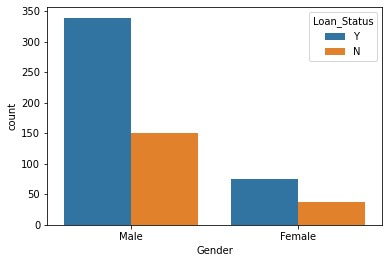

In [7]:
#here we notice that man's count are far greater than women count
sns.countplot(x='Gender',hue='Loan_Status',data=train_data)

In [8]:
category={"Male": 1,"Female":0}
train_data.Gender=train_data.Gender.map(category)

In [9]:
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1.0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1.0,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1.0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1.0,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,1.0,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1.0,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,1.0,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
category={"Graduate": 1,"Not Graduate":0}
train_data.Education=train_data.Education.map(category)
train_data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,No,0,1,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1.0,Yes,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1.0,Yes,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1.0,Yes,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1.0,No,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,No,0,1,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,1.0,Yes,3+,1,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1.0,Yes,1,1,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,1.0,Yes,2,1,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [11]:
category={"No": 0,"Yes":1}
train_data.Married=train_data.Married.map(category)
train_data.Self_Employed=train_data.Self_Employed.map(category)
train_data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,1.0,1.0,3+,1,0.0,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,1.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,1.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,Urban,Y


In [12]:
#we notice that man count are greater than female count so we replace 1 in the gender features that contains missing values
train_data["Gender"].fillna(1,inplace=True)

In [13]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
train_data.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

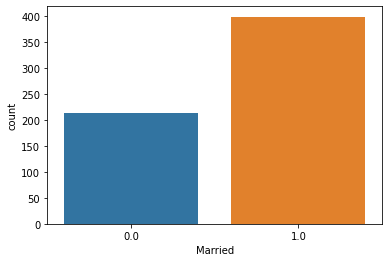

In [15]:
sns.countplot(x='Married',data=train_data)

In [16]:
#here also we notice that married people and women people are in the 2:1.so we replacing the missing values with married
train_data['Married'].fillna(1,inplace=True)

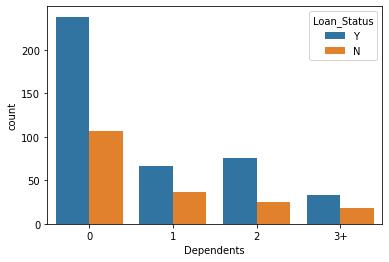

In [17]:
sns.countplot(x='Dependents',hue='Loan_Status',data=train_data)

In [18]:
#here also we notice that 0 has more values than other 
train_data['Dependents'].fillna(0,inplace=True)

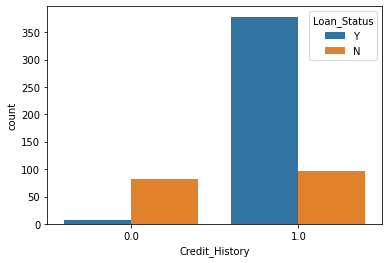

In [19]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=train_data)

In [20]:
#here also same procedure
train_data['Credit_History'].fillna(1,inplace=True)

Text(0.5, 0, 'Loanstatus')

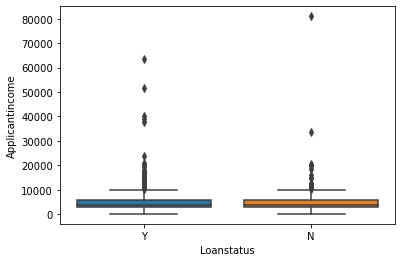

In [21]:
#relationship of numerical variables and loanstatus
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=train_data)
plt.ylabel('Applicantincome')
plt.xlabel('Loanstatus')





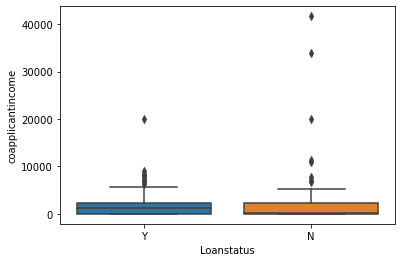

In [22]:
sns.boxplot(x='Loan_Status',y='CoapplicantIncome',data=train_data)
plt.xlabel('Loanstatus')
plt.ylabel('coapplicantincome')
plt.show()

Text(0, 0.5, 'loanamount')

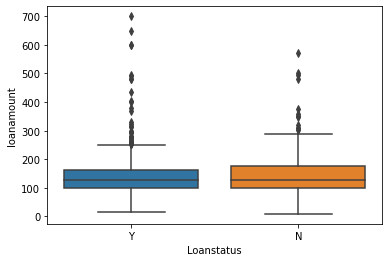

In [23]:
#relationship of loan amount and loanstatus
sns.boxplot(x='Loan_Status',y='LoanAmount',data=train_data)
plt.xlabel('Loanstatus')
plt.ylabel('loanamount')

C:\Users\BALAKUMAR\anaconda3\lib\site-packages\seaborn\categorical.py:1311: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\BALAKUMAR\anaconda3\lib\site-packages\seaborn\categorical.py:1315: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


Text(0, 0.5, 'loanamountterm')

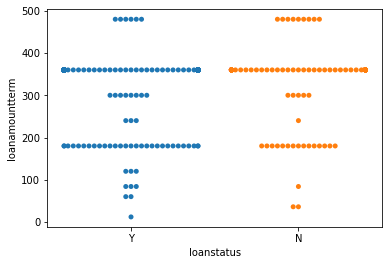

In [24]:
#relationship of loanamount term and loanstatus
sns.swarmplot(x='Loan_Status',y='Loan_Amount_Term',data=train_data)
plt.xlabel('loanstatus')
plt.ylabel('loanamountterm')

handling the missing values for continous variables.we notice that there are many outlier so we using median value


In [25]:
median_value=train_data['LoanAmount'].median()
train_data['LoanAmount'].fillna(median_value,inplace=True)

In [26]:
median=train_data['Loan_Amount_Term'].median()
train_data['Loan_Amount_Term'].fillna(median,inplace=True)

In [27]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


#guassion distribution give better results to linear and logistic regression because of some properties.But remaining algorithm it is unnecessary

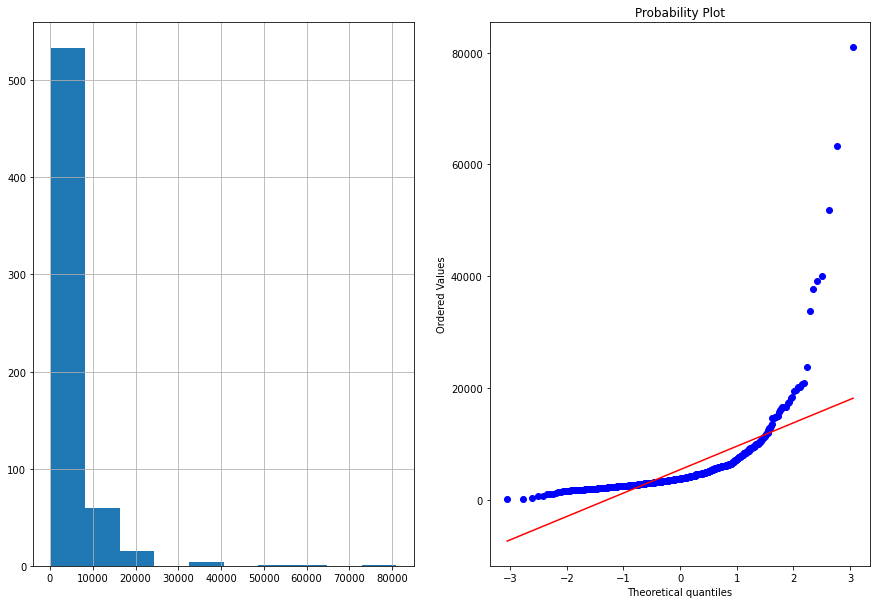

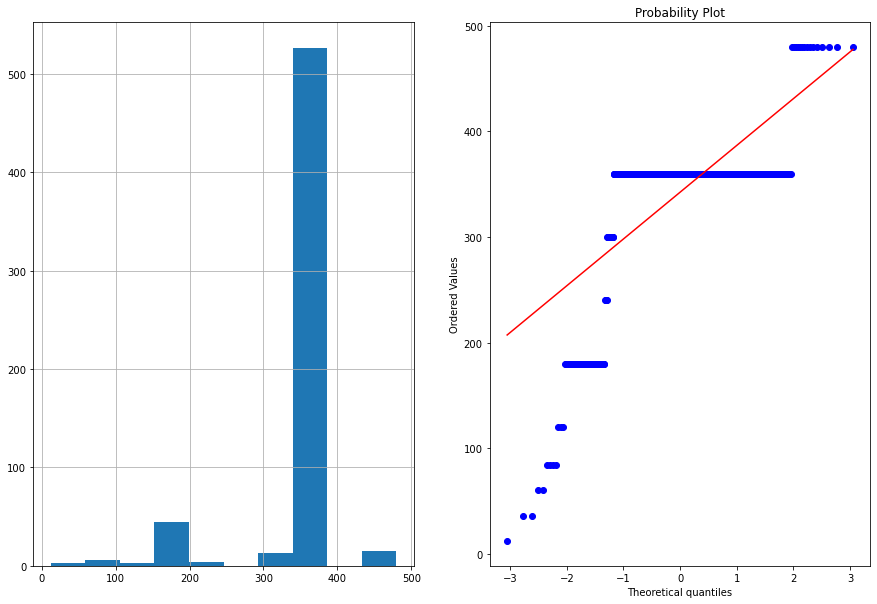

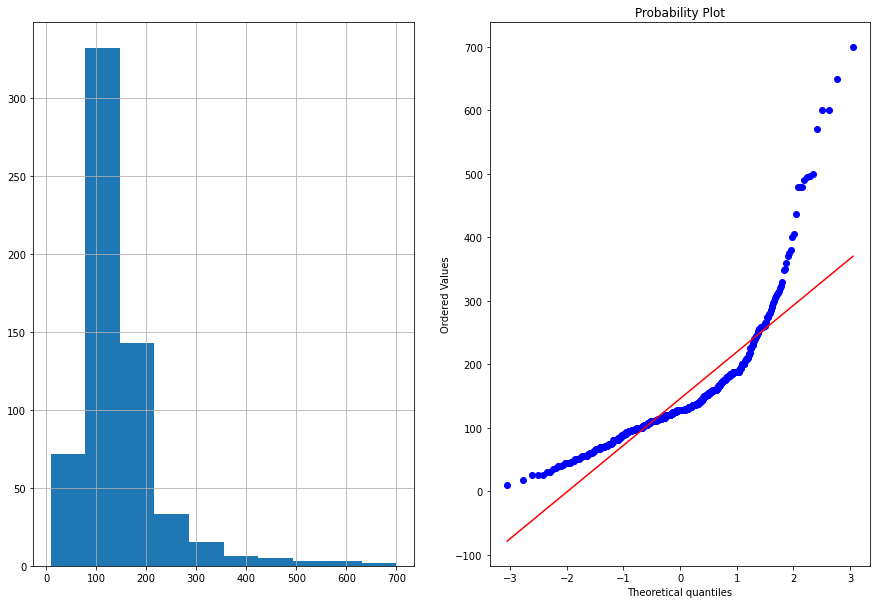

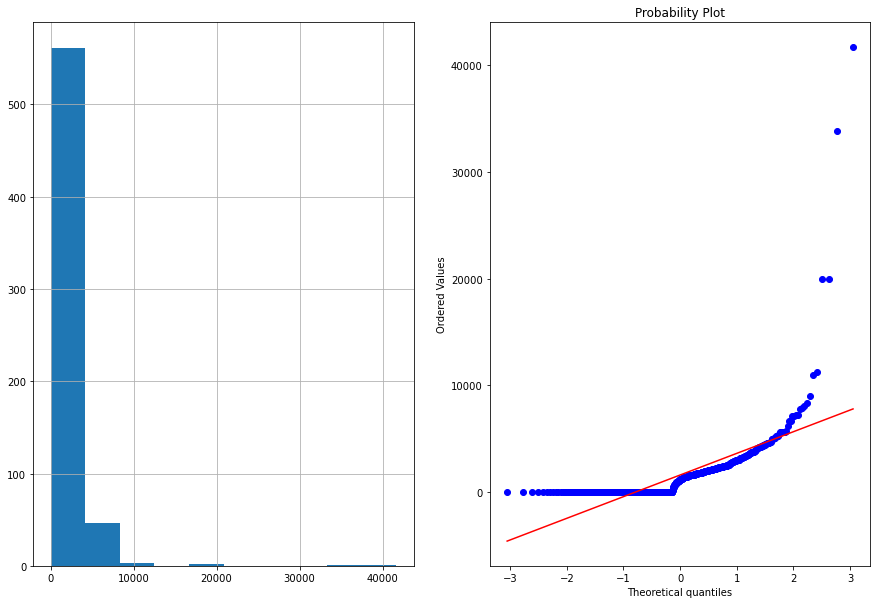

In [28]:
#next we have to check continous variables follows a normal distribution using histogram
import scipy.stats as stat
import pylab

def qqplots(features):
    plt.figure(figsize=(15,10))
    plt.subplot(1,2,1)
    train_data[features].hist()
    plt.subplot(1,2,2)
    stat.probplot(train_data[features],dist='norm',plot=pylab)

    
qqplots('ApplicantIncome')
qqplots('Loan_Amount_Term')
qqplots('LoanAmount')
qqplots('CoapplicantIncome')


In [29]:
train_data["ApplicantIncome"]=np.log(train_data["ApplicantIncome"])

In [30]:
train_data["LoanAmount"]=np.log(train_data["LoanAmount"])

In [31]:
train_data["Loan_Amount_Term"]=np.log(train_data["Loan_Amount_Term"])

In [32]:
train_data['CoapplicantIncome']=np.log(train_data['CoapplicantIncome']+1)

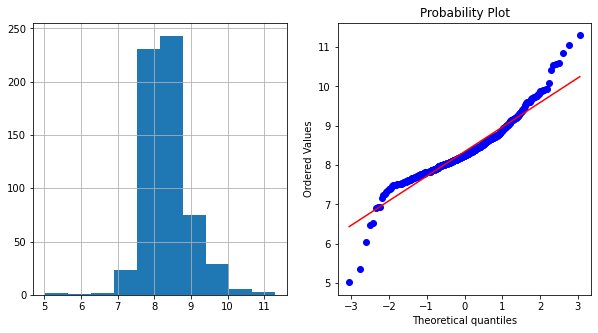

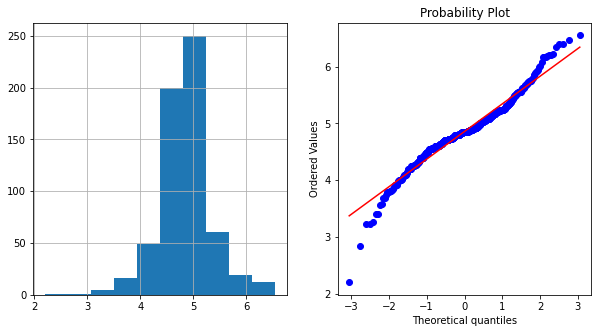

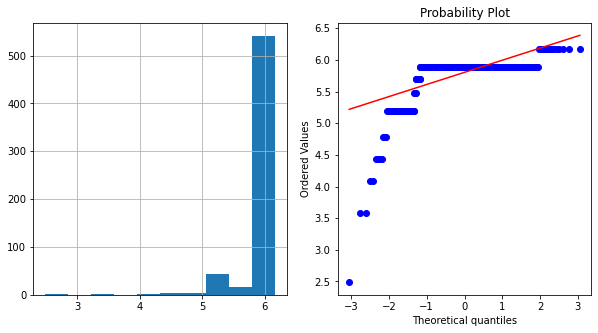

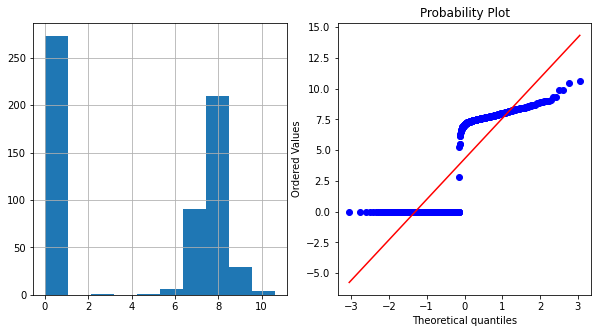

In [33]:
#after applying logarithmic transformation, the features applicantincome and loanamount follow normal distribution
def aftertrans(features):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    train_data[features].hist()
    plt.subplot(1,2,2)
    stat.probplot(train_data[features],dist='norm',plot=pylab)
    
aftertrans('ApplicantIncome')
aftertrans('LoanAmount')
aftertrans('Loan_Amount_Term')
aftertrans('CoapplicantIncome')

In [34]:
train_data.set_index('Loan_ID',inplace=True)

In [35]:
train_data['Dependents']=train_data['Dependents'].replace('3+',3)

In [36]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1.0,0.0,0,1,0.0,8.674026,0.000000,4.852030,5.886104,1.0,Urban,Y
LP001003,1.0,1.0,1,1,0.0,8.430109,7.319202,4.852030,5.886104,1.0,Rural,N
LP001005,1.0,1.0,0,1,1.0,8.006368,0.000000,4.189655,5.886104,1.0,Urban,Y
LP001006,1.0,1.0,0,0,0.0,7.856707,7.765993,4.787492,5.886104,1.0,Urban,Y
LP001008,1.0,0.0,0,1,0.0,8.699515,0.000000,4.948760,5.886104,1.0,Urban,Y


In [37]:
category={'Urban':0,'Rural':1,'Semiurban':3}
train_data['Property_Area']=train_data.Property_Area.map(category)

In [38]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1.0,0.0,0,1,0.0,8.674026,0.000000,4.852030,5.886104,1.0,0,Y
LP001003,1.0,1.0,1,1,0.0,8.430109,7.319202,4.852030,5.886104,1.0,1,N
LP001005,1.0,1.0,0,1,1.0,8.006368,0.000000,4.189655,5.886104,1.0,0,Y
LP001006,1.0,1.0,0,0,0.0,7.856707,7.765993,4.787492,5.886104,1.0,0,Y
LP001008,1.0,0.0,0,1,0.0,8.699515,0.000000,4.948760,5.886104,1.0,0,Y


In [39]:
y=train_data.Loan_Status
y

Loan_ID
LP001002    Y
LP001003    N
LP001005    Y
LP001006    Y
LP001008    Y
           ..
LP002978    Y
LP002979    Y
LP002983    Y
LP002984    Y
LP002990    N
Name: Loan_Status, Length: 614, dtype: object

In [40]:
x=train_data.drop(columns=['Loan_Status'],axis=1)
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001002,1.0,0.0,0,1,0.0,8.674026,0.000000,4.852030,5.886104,1.0,0
LP001003,1.0,1.0,1,1,0.0,8.430109,7.319202,4.852030,5.886104,1.0,1
LP001005,1.0,1.0,0,1,1.0,8.006368,0.000000,4.189655,5.886104,1.0,0
LP001006,1.0,1.0,0,0,0.0,7.856707,7.765993,4.787492,5.886104,1.0,0
LP001008,1.0,0.0,0,1,0.0,8.699515,0.000000,4.948760,5.886104,1.0,0


In [56]:
new={'Y':1,'N':0}
train_data['Loan_Status']=train_data.Loan_Status.map(new)


In [57]:
y=train_data['Loan_Status']
y

Loan_ID
LP001002    1
LP001003    0
LP001005    1
LP001006    1
LP001008    1
           ..
LP002978    1
LP002979    1
LP002983    1
LP002984    1
LP002990    0
Name: Loan_Status, Length: 614, dtype: int64

In [93]:
#featurescalin
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV


In [100]:
#hyperparamater optimization
parameter={'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
           'solver' :  ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
          }

In [48]:
x['Self_Employed']=x['Self_Employed'].fillna(1)

In [129]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=0)
logistic_model=LogisticRegression()
random_search=RandomizedSearchCV(logistic_model,param_distributions=parameter,n_iter=2,scoring='roc_auc',n_jobs=1,cv=5,verbose=3)
logistic_model.fit(train_x,train_y)
pred=logistic_model.predict(test_x)
print(accuracy_score(test_y,pred))

0.8311688311688312


In [130]:
random_search.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [107]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=0)
loan_model=KNeighborsClassifier()
random=RandomizedSearchCV(loan_model,param_distributions=parameter)
loan_model.fit(train_x,train_y)
pred=loan_model.predict(test_x)
print(accuracy_score(test_y,pred))



0.7792207792207793


In [92]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=0)
svmmodel=SVC(C=1,kernel='linear')
svmmodel.fit(train_x,train_y)
prediction=svmmodel.predict(test_x)
print(accuracy_score(test_y,prediction))

0.8311688311688312


In [82]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=0)
randmodel=RandomForestClassifier(criterion='entropy')
randmodel.fit(train_x,train_y)
prediction=randmodel.predict(test_x)
print(accuracy_score(test_y,prediction))

0.7987012987012987


In [87]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=0)
model=DecisionTreeClassifier(criterion='entropy')
model.fit(train_x,train_y)
prediction=model.predict(test_x)
print(accuracy_score(test_y,prediction))

0.7402597402597403


In [ ]:
train_data.set_index('Loan_ID',inplace=True)

In [ ]:
train_data=pd.get_dummies(train_data)
train_data